### Improve data quality

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tf.version.VERSION

'2.9.0'

In [3]:
df_transport=pd.read_csv('data/untidy_vehicle_data_toy.csv')
df_transport.head()

,Date,Zip Code,Model Year,Fuel,Make,Light_Duty,Vehicles
0,10/1/2018,90000.0,2006,Gasoline,OTHER/UNK,NaN,1.0
1,10/1/2018,NaN,2014,Gasoline,NaN,Yes,1.0
2,NaN,90000.0,NaN,Gasoline,OTHER/UNK,Yes,NaN
3,10/1/2018,90000.0,2017,Gasoline,OTHER/UNK,Yes,1.0
4,10/1/2018,90000.0,<2006,Diesel and Diesel Hybrid,OTHER/UNK,No,55.0


#### column data types

In [4]:
df_transport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        497 non-null    object 
 1   Zip Code    497 non-null    float64
 2   Model Year  497 non-null    object 
 3   Fuel        497 non-null    object 
 4   Make        496 non-null    object 
 5   Light_Duty  496 non-null    object 
 6   Vehicles    496 non-null    float64
dtypes: float64(2), object(5)
memory usage: 27.4+ KB


#### summary statistics

In [5]:
df_transport.describe()

,Zip Code,Vehicles
count,497.00000,496.000000
mean,89838.23340,74.512097
std,3633.35609,243.839871
min,9001.00000,1.000000
25%,90001.00000,14.000000
50%,90001.00000,25.000000
75%,90001.00000,56.250000
max,90002.00000,3178.000000


In [6]:
df_transport.groupby('Fuel').first()

,Date,Zip Code,Model Year,Make,Light_Duty,Vehicles
Fuel,,,,,,
Battery Electric,10/1/2018,90000.0,<2006,OTHER/UNK,No,4.0
Diesel and Diesel Hybrid,10/1/2018,90000.0,<2006,OTHER/UNK,No,55.0
Flex-Fuel,10/14/2018,90001.0,2007,Type_A,Yes,78.0
Gasoline,10/1/2018,90000.0,2006,OTHER/UNK,Yes,1.0
Hybrid Gasoline,10/24/2018,90001.0,2009,OTHER/UNK,Yes,18.0
Natural Gas,10/25/2018,90001.0,2009,OTHER/UNK,No,2.0
Other,10/8/2018,90000.0,<2006,OTHER/UNK,Yes,6.0
Plug-in Hybrid,11/2/2018,90001.0,2012,OTHER/UNK,Yes,1.0


In [7]:
df_transport.groupby('Fuel').mean()

,Zip Code,Vehicles
Fuel,,
Battery Electric,90000.857143,1.857143
Diesel and Diesel Hybrid,90001.181818,18.327273
Flex-Fuel,90001.203704,27.166667
Gasoline,90001.229851,101.473054
Hybrid Gasoline,90001.258065,15.419355
Natural Gas,90001.250000,3.250000
Other,90000.500000,7.500000
Plug-in Hybrid,90001.000000,5.750000


#### check missing values

In [8]:
df_transport.isnull().sum()

Date          2
Zip Code      2
Model Year    2
Fuel          2
Make          3
Light_Duty    3
Vehicles      3
dtype: int64

In [9]:
df_transport.isnull().head()

,Date,Zip Code,Model Year,Fuel,Make,Light_Duty,Vehicles
0,False,False,False,False,False,True,False
1,False,True,False,False,True,False,False
2,True,False,True,False,False,False,True
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False


#### data analysis

In [10]:
df_transport.shape

(499, 7)

In [11]:
df_transport.columns.tolist()

['Date', 'Zip Code', 'Model Year', 'Fuel', 'Make', 'Light_Duty', 'Vehicles']

In [12]:
df_transport.nunique()

Date          130
Zip Code        4
Model Year     15
Fuel            8
Make           43
Light_Duty      2
Vehicles      151
dtype: int64

In [13]:
df_transport.isnull().sum().values.sum()

17

In [14]:
df_transport['Fuel'].value_counts()

Gasoline                    336
Diesel and Diesel Hybrid     55
Flex-Fuel                    54
Hybrid Gasoline              31
Plug-in Hybrid                8
Battery Electric              7
Natural Gas                   4
Other                         2
Name: Fuel, dtype: int64

In [15]:
df_transport['Fuel'].value_counts().index[0]

'Gasoline'

#### replace missing values

In [16]:
df_transport=df_transport.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [17]:
df_transport.isnull().sum()

Date          0
Zip Code      0
Model Year    0
Fuel          0
Make          0
Light_Duty    0
Vehicles      0
dtype: int64

#### convert Date column to Datetime format

In [18]:
df_transport['Date']=pd.to_datetime(df_transport['Date'],format='%m/%d/%Y')

In [19]:
df_transport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        499 non-null    datetime64[ns]
 1   Zip Code    499 non-null    float64       
 2   Model Year  499 non-null    object        
 3   Fuel        499 non-null    object        
 4   Make        499 non-null    object        
 5   Light_Duty  499 non-null    object        
 6   Vehicles    499 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 27.4+ KB


#### create comumns for day, month and year

In [20]:
df_transport['day']=df_transport['Date'].dt.day
df_transport['month']=df_transport['Date'].dt.month
df_transport['year']=df_transport['Date'].dt.year
df_transport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        499 non-null    datetime64[ns]
 1   Zip Code    499 non-null    float64       
 2   Model Year  499 non-null    object        
 3   Fuel        499 non-null    object        
 4   Make        499 non-null    object        
 5   Light_Duty  499 non-null    object        
 6   Vehicles    499 non-null    float64       
 7   day         499 non-null    int64         
 8   month       499 non-null    int64         
 9   year        499 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 39.1+ KB


In [21]:
df_transport.groupby('month').first()

,Date,Zip Code,Model Year,Fuel,Make,Light_Duty,Vehicles,day,year
month,,,,,,,,,
1,2019-01-01,90001.0,2016,Gasoline,Type_G,Yes,18.0,1,2019
2,2019-02-01,90001.0,2017,Gasoline,Type_D,Yes,13.0,1,2019
3,2019-03-01,90001.0,2018,Gasoline,Type_C,Yes,32.0,1,2019
10,2018-10-01,90000.0,2006,Gasoline,OTHER/UNK,Yes,1.0,1,2018
11,2018-11-01,90001.0,2007,Gasoline,Type_M,Yes,15.0,1,2018
12,2018-12-02,90001.0,2015,Gasoline,Type_G,Yes,19.0,2,2018


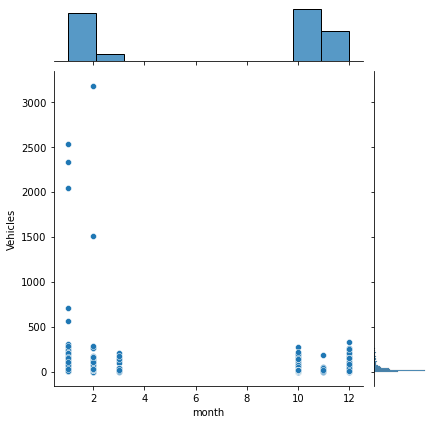

In [22]:
sns.jointplot(x='month',y='Vehicles',data=df_transport)

#### rename columns

In [24]:
columns = { 'Date': 'date', 'Zip Code':'zipcode', 'Model Year': 'modelyear', 'Fuel': 'fuel', 'Make': 'make', 'Light_Duty': 'lightduty', 'Vehicles': 'vehicles'}

In [25]:
df_transport.rename(columns=columns, inplace = True) 

In [26]:
df_transport.head(2)

,date,zipcode,modelyear,fuel,make,lightduty,vehicles,day,month,year
0,2018-10-01,90000.0,2006,Gasoline,OTHER/UNK,Yes,1.0,1,10,2018
1,2018-10-01,90001.0,2014,Gasoline,OTHER/UNK,Yes,1.0,1,10,2018


#### copy dataframe

In [28]:
df = df_transport.loc[df_transport.modelyear != '<2006'].copy()

In [30]:
df['modelyear'].value_counts()

2007    53
2008    45
2006    36
2010    34
2014    31
2015    30
2017    29
2016    29
2013    27
2009    25
2012    25
2011    24
2018    23
2019     5
Name: modelyear, dtype: int64

#### categorical to numerical

In [32]:
df['lightduty'].value_counts()

Yes    374
No      42
Name: lightduty, dtype: int64

In [34]:
df['lightduty']=df['lightduty'].apply(lambda x: 1 if x=='Yes' else 0)

In [35]:
df['lightduty'].value_counts()

1    374
0     42
Name: lightduty, dtype: int64

#### one-hot encoding

In [36]:
data_dummy = pd.get_dummies(df[['zipcode','modelyear', 'fuel', 'make']], drop_first=True)

In [37]:
data_dummy.head()

,zipcode,modelyear_2007,modelyear_2008,modelyear_2009,modelyear_2010,modelyear_2011,modelyear_2012,modelyear_2013,modelyear_2014,modelyear_2015,...,make_Type_P,make_Type_Q,make_Type_R,make_Type_S,make_Type_T,make_Type_U,make_Type_V,make_Type_W,make_Type_X,make_Type_Y
0,90000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,90001.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,90000.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,90001.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,90001.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
df = pd.concat([df,data_dummy], axis=1)
df.head()

,date,zipcode,modelyear,fuel,make,lightduty,vehicles,day,month,year,...,make_Type_P,make_Type_Q,make_Type_R,make_Type_S,make_Type_T,make_Type_U,make_Type_V,make_Type_W,make_Type_X,make_Type_Y
0,2018-10-01,90000.0,2006,Gasoline,OTHER/UNK,1,1.0,1,10,2018,...,0,0,0,0,0,0,0,0,0,0
1,2018-10-01,90001.0,2014,Gasoline,OTHER/UNK,1,1.0,1,10,2018,...,0,0,0,0,0,0,0,0,0,0
3,2018-10-01,90000.0,2017,Gasoline,OTHER/UNK,1,1.0,1,10,2018,...,0,0,0,0,0,0,0,0,0,0
16,2018-10-09,90001.0,2006,Diesel and Diesel Hybrid,Type_C,0,16.0,9,10,2018,...,0,0,0,0,0,0,0,0,0,0
17,2018-10-10,90001.0,2006,Diesel and Diesel Hybrid,OTHER/UNK,0,23.0,10,10,2018,...,0,0,0,0,0,0,0,0,0,0


In [39]:
df = df.drop(['date','zipcode','modelyear', 'fuel', 'make'], axis=1)

In [40]:
df.head()

,lightduty,vehicles,day,month,year,modelyear_2007,modelyear_2008,modelyear_2009,modelyear_2010,modelyear_2011,...,make_Type_P,make_Type_Q,make_Type_R,make_Type_S,make_Type_T,make_Type_U,make_Type_V,make_Type_W,make_Type_X,make_Type_Y
0,1,1.0,1,10,2018,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1.0,1,10,2018,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1.0,1,10,2018,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,0,16.0,9,10,2018,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17,0,23.0,10,10,2018,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### temporal feature columns

In [42]:
print(df.day.unique())
print(df.month.unique())
print(df.year.unique())

[ 1  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31
  2  3  4  5  6  7  8]
[10 11 12  1  2  3]
[2018 2019]
